In [50]:
# Dataset Source (https://data.world/data-society/global-climate-change-data/workspace/file?filename=GlobalLandTemperatures%2FGlobalLandTemperaturesByCountry.csv)

import pandas as pd
globaltempdf = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')
globaltempdf

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [51]:
# Hilangkan kolom yang tidak terpakai

globaltempdf = globaltempdf.drop(columns=['AverageTemperatureUncertainty', 'City', 'Latitude', 'Longitude'])
globaltempdf

,dt,AverageTemperature,Country
0,1849-01-01,26.704,Côte D'Ivoire
1,1849-02-01,27.434,Côte D'Ivoire
2,1849-03-01,28.101,Côte D'Ivoire
3,1849-04-01,26.140,Côte D'Ivoire
4,1849-05-01,25.427,Côte D'Ivoire
...,...,...,...
239172,2013-05-01,18.979,China
239173,2013-06-01,23.522,China
239174,2013-07-01,25.251,China
239175,2013-08-01,24.528,China


In [52]:
# Ubah kolom dt menjadi datetime

globaltempdf['dt'] = pd.to_datetime(globaltempdf['dt'])
globaltempdf = globaltempdf.rename(columns={'dt': 'Date'})
globaltempdf

,Date,AverageTemperature,Country
0,1849-01-01,26.704,Côte D'Ivoire
1,1849-02-01,27.434,Côte D'Ivoire
2,1849-03-01,28.101,Côte D'Ivoire
3,1849-04-01,26.140,Côte D'Ivoire
4,1849-05-01,25.427,Côte D'Ivoire
...,...,...,...
239172,2013-05-01,18.979,China
239173,2013-06-01,23.522,China
239174,2013-07-01,25.251,China
239175,2013-08-01,24.528,China


In [53]:
# buat dataframe baru yang berisikan country china

chinatempdf = globaltempdf.loc[globaltempdf['Country'].isin(['China'])]
chinatempdf

,Date,AverageTemperature,Country
47038,1820-08-01,19.674,China
47039,1820-09-01,14.841,China
47040,1820-10-01,4.825,China
47041,1820-11-01,-5.807,China
47042,1820-12-01,-15.398,China
...,...,...,...
239172,2013-05-01,18.979,China
239173,2013-06-01,23.522,China
239174,2013-07-01,25.251,China
239175,2013-08-01,24.528,China


In [54]:
# menghilangkan kolom country karena sudah tidak terpakai

chinatempdf = chinatempdf.drop(columns=['Country']).reset_index(drop=True)
chinatempdf

,Date,AverageTemperature
0,1820-08-01,19.674
1,1820-09-01,14.841
2,1820-10-01,4.825
3,1820-11-01,-5.807
4,1820-12-01,-15.398
...,...,...
35439,2013-05-01,18.979
35440,2013-06-01,23.522
35441,2013-07-01,25.251
35442,2013-08-01,24.528


In [55]:
# drop tabel yang kosong dan cek menggunakan fungsi isnull()

chinatempdf = chinatempdf.dropna(subset=['AverageTemperature'])
chinatempdf.isnull().sum()

Date                  0
AverageTemperature    0
dtype: int64

In [56]:
# membatasi dataset menjadi 100 tahun

date_range = (chinatempdf['Date'] > '1913-01-01') & (chinatempdf['Date'] <= '2013-08-01')
chinatempdf = chinatempdf.loc[date_range]
chinatempdf

,Date,AverageTemperature
1110,1913-02-01,-13.231
1111,1913-03-01,-4.514
1112,1913-04-01,7.865
1113,1913-05-01,14.086
1114,1913-06-01,18.953
...,...,...
35438,2013-04-01,12.563
35439,2013-05-01,18.979
35440,2013-06-01,23.522
35441,2013-07-01,25.251


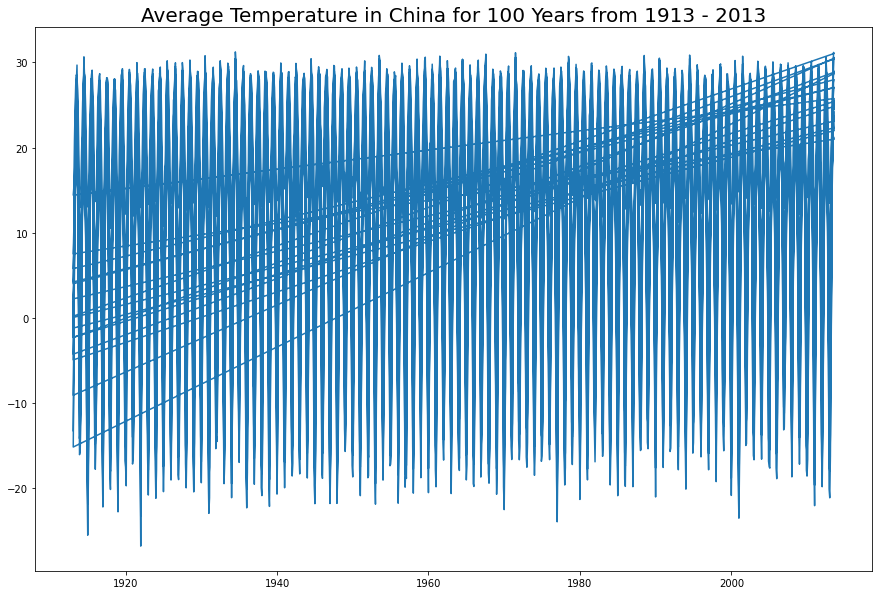

In [57]:
# plot grafik

import matplotlib.pyplot as plt

date = chinatempdf['Date'].values
avg_temp  = chinatempdf['AverageTemperature'].values

plt.figure(figsize=(15,10))
plt.plot(date, avg_temp)
plt.title(
    'Average Temperature in China for 100 Years from 1913 - 2013',
    fontsize=20
)
plt.show()

In [58]:
# menggunakan fungsi yang dapat diproses oleh model

import tensorflow as tf
from tensorflow.keras import layers

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [59]:
# train test split dengan validation 20 %

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(avg_temp, date, test_size = 0.2, shuffle=False)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(15449,) (15449,)
(3863,) (3863,)


In [60]:
# masukan train test kepada fungsi sebelumnya

train_set = windowed_dataset(X_train, window_size=32, batch_size=64, shuffle_buffer=2500)
test_set = windowed_dataset(X_test, window_size=32, batch_size=64, shuffle_buffer=2500)

In [61]:
# menggunakan sequential dengan 2 layer LSTM da 2 Dense

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

model = Sequential([
                    layers.LSTM(64, return_sequences=True),
                    layers.LSTM(64),
                    layers.Dense(256, activation="relu"),
                    layers.Dense(1)
])

In [62]:
# Hitung MAE

MAE = 0.1*(chinatempdf['AverageTemperature'].max() - chinatempdf['AverageTemperature'].min())
print(MAE)

5.8004999999999995


In [63]:
# Buat Callback untuk menghentikan training saat MAE < 10 %

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < MAE and logs.get('val_mae') < MAE):
      print('\nSelamat MAE dari model < 10% skala data')
      self.model.stop_training = True
callbacks = myCallback()

In [64]:
# compile model dengan opttiizer

optimizer = tf.keras.optimizers.SGD(
    learning_rate=1e-3,
    momentum=0.2
)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=['mae']
)

In [65]:
# train model

hist = model.fit(
    train_set,
    epochs=100,
    validation_data=test_set,
    callbacks=[callbacks]
)

Epoch 1/100
241/241 [==============================] - 6s 14ms/step - loss: 13.3798 - mae: 13.8737 - val_loss: 12.6466 - val_mae: 13.1418
Epoch 2/100
241/241 [==============================] - 3s 11ms/step - loss: 11.7918 - mae: 12.2843 - val_loss: 9.9849 - val_mae: 10.4722
Epoch 3/100
241/241 [==============================] - 3s 11ms/step - loss: 9.3866 - mae: 9.8781 - val_loss: 8.1083 - val_mae: 8.5971
Epoch 4/100
241/241 [==============================] - 3s 11ms/step - loss: 8.5311 - mae: 9.0194 - val_loss: 7.8549 - val_mae: 8.3484
Epoch 5/100
241/241 [==============================] - 3s 11ms/step - loss: 8.2996 - mae: 8.7888 - val_loss: 7.6394 - val_mae: 8.1341
Epoch 6/100
241/241 [==============================] - 3s 11ms/step - loss: 8.0153 - mae: 8.5038 - val_loss: 7.3323 - val_mae: 7.8265
Epoch 7/100
241/241 [==============================] - 3s 12ms/step - loss: 7.6129 - mae: 8.1000 - val_loss: 6.8326 - val_mae: 7.3227
Epoch 8/100
241/241 [==============================] - 

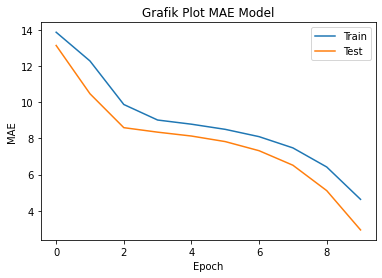

In [66]:
# grafik plot MAE

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Grafik Plot MAE Model')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

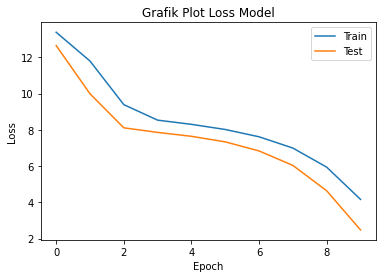

In [67]:
# grafik plot loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Grafik Plot Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()